# Fashion MNIST Project 

Fashion-MNIST is a dataset of Zalando's (http://www.zalando.com) article images —consisting of a training set of 60,000 examples
and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 
Fashion-MNIST serves as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.
It shares the same image size and structure of training and testing splits

In [1]:
import numpy as np    
import pandas as pd
import gzip
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

Loading the data from my local folder:

In [3]:
filePath_train_set = (r'C:\Users\jhach\Desktop\datasets/train-images-idx3-ubyte.gz')
filePath_train_label = (r'C:\Users\jhach\Desktop\datasets/train-labels-idx1-ubyte.gz')
filePath_test_set = (r'C:\Users\jhach\Desktop\datasets/t10k-images-idx3-ubyte.gz')
filePath_test_label = (r'C:\Users\jhach\Desktop\datasets/t10k-labels-idx1-ubyte.gz')

In [4]:
with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

print(type(testLabel))

print(trainSet.shape)

print(trainLabel.shape)

print(testSet.shape)

print(testLabel.shape)

X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)
(60000, 784)
(60000,)
(10000, 784)
(10000,)


Our dataset consists of 60,000 images and each image has 784 features. An image consists of 28x28 pixels, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

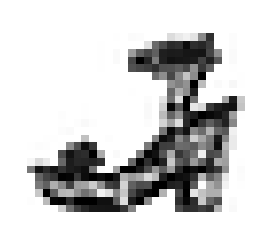

In [5]:
showImage(X_train[60])

In [6]:
y_train[60]

5

Shuffling the training dataset - to get uniform samples for cross validation

We need to shuffle our training data to ensure that we don't miss out any digit in a cross validation fold.

In [7]:
# shuffling the data
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Each image (instance) in the dataset has 784 pixels (features) and value of each feature(pixel) ranges from 0 to 255, 
and this range is too wide , hence we would need to use feature scaling here to apply standardization to this dataset X_train,
so that all the values of each feature (pixel) is in a small range (based on the standard deviation value).

In [8]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

Trying SGDClassifier model:

In [10]:
# training SGDClassifier model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [11]:
y_train_predict = sgd_clf.predict(X_train[0].reshape(1, -1))

In [12]:
y_train[8]

4

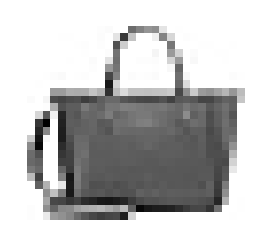

In [13]:
y_train_predict[0]
showImage(X_train[0])

Let us predict all instances of training dataset X_train_scaled using the above trained model:

In [14]:
y_train_predict = sgd_clf.predict(X_train_scaled)
sgd_accuracy = accuracy_score(y_train, y_train_predict)
sgd_precision = precision_score(y_train, y_train_predict, average='weighted')
sgd_recall = recall_score(y_train, y_train_predict, average='weighted')
sgd_f1_score = f1_score(y_train, y_train_predict, average='weighted')
print("SGD Accuracy: ", sgd_accuracy)
print("SGD Precision: ", sgd_precision)
print("SGD Recall: ", sgd_recall)
print("SGD F1 Score: ", sgd_f1_score)

SGD Accuracy:  0.8460833333333333
SGD Precision:  0.8452191984816628
SGD Recall:  0.8460833333333333
SGD F1 Score:  0.8438106231931057


Now, let us try LogisticRegression

Since this is multi-class problem (we need to predict multiple classes (0,1,2...9) for the given label), hence we will use
Softmax Regression, which is nothing but Logistic Regression for multi-class classification problems:

In [15]:
# training the logistic regression model
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
log_clf.fit(X_train_scaled, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
y_train_predict = log_clf.predict(X_train[0].reshape(1, -1))

In [17]:
y_train[0]

8

In [18]:
y_train_predict[0]

8

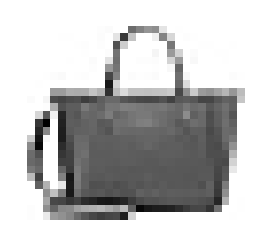

In [19]:
showImage(X_train[0])

In [20]:
y_train_predict = log_clf.predict(X_train_scaled)

log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_recall)
print("Logistic F1 Score: ", log_f1_score)

Logistic Accuracy:  0.8775333333333334
Logistic Precision:  0.876648632278309
Logistic Recall:  0.8775333333333334
Logistic F1 Score:  0.8769281105807729


Now, let us try DecisionTreeClassifier.

In [21]:
# training DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)
dec_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [22]:
y_train_predict = dec_tree_clf.predict(X_train[0].reshape(1, -1))

In [23]:
y_train[0]

8

In [24]:
y_train_predict[0]

8

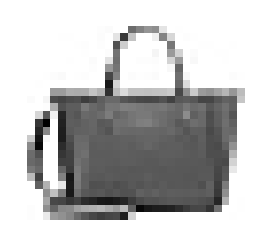

In [25]:
showImage(X_train[0])

In [26]:
y_train_predict = dec_tree_clf.predict(X_train)

dec_tree_accuracy = accuracy_score(y_train, y_train_predict)
dec_tree_precision = precision_score(y_train, y_train_predict, average='weighted')
dec_tree_recall = recall_score(y_train, y_train_predict, average='weighted')
dec_tree_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Decision Tree Accuracy: ", dec_tree_accuracy)
print("Decision Tree Precision: ", dec_tree_precision)
print("Decision Tree Recall: ", dec_tree_recall)
print("Decision Tree F1 Score: ", dec_tree_f1_score)

Decision Tree Accuracy:  1.0
Decision Tree Precision:  1.0
Decision Tree Recall:  1.0
Decision Tree F1 Score:  1.0


Now, let us try RandomForestClassifier

In [ ]:
# training RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
rnd_clf.fit(X_train, y_train)

C:\Users\jhach\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
y_train_predict = rnd_clf.predict(X_train[0].reshape(1, -1))

In [ ]:
y_train[0]

In [ ]:
y_train_predict[0]

In [ ]:
showImage(X_train[0])

In [ ]:
y_train_predict = rnd_clf.predict(X_train)

rnd_accuracy = accuracy_score(y_train, y_train_predict)
rnd_precision = precision_score(y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(y_train, y_train_predict, average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_recall)
print("Random Forest F1 Score: ", rnd_f1_score)

Now, let us try Ensemble with soft voting:

In [ ]:
# training VotingClassifier model
from sklearn.ensemble import VotingClassifier
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
voting_clf = VotingClassifier(estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],voting='soft')

voting_clf.fit(X_train_scaled, y_train)

In [ ]:
y_train_predict = voting_clf.predict(X_train[0].reshape(1, -1))

In [ ]:
y_train[0]

In [ ]:
y_train_predict[0]

In [ ]:
showImage(X_train[0])

In [ ]:
y_train_predict = voting_clf.predict(X_train_scaled)

voting_accuracy = accuracy_score(y_train, y_train_predict)
voting_precision = precision_score(y_train, y_train_predict, average='weighted')
voting_recall = recall_score(y_train, y_train_predict, average='weighted')
voting_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Ensemble Accuracy: ", voting_accuracy)
print("Ensemble Precision: ", voting_precision)
print("Ensemble Recall: ", voting_recall)
print("Ensemble F1 Score: ", voting_f1_score)

Now, let us try XGBClassifier:

In [ ]:
# training XGBClassifier model
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
xgb_clf.fit(X_train, y_train)

In [ ]:
y_train_predict = xgb_clf.predict(X_train[0].reshape(1, -1))

In [ ]:
y_train[0]

In [ ]:
y_train_predict[0]

In [ ]:
showImage(X_train[0])

In [ ]:
y_train_predict = xgb_clf.predict(X_train)
xgb_accuracy = accuracy_score(y_train, y_train_predict)
xgb_precision = precision_score(y_train, y_train_predict, average='weighted')
xgb_recall = recall_score(y_train, y_train_predict, average='weighted')
xgb_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("XGBoost Accuracy: ", xgb_accuracy)
print("XGBoost Precision: ", xgb_precision)
print("XGBoost Recall: ", xgb_recall)
print("XGBoost F1 Score: ", xgb_f1_score)

Now, let us use cross validation to find the proper score of each model, also to ensure that the model is not overfitting or underfitting.
If the cross validation score values for a performance measure (say accuracy) are not varying significantly for various folds (k-folds) then we can say that the model is not overfitting.
If the cross validation score values for a performance measure (say accuracy) are not very low for various folds (k-folds) then we can say that the model is not underfitting.
We will perform k-fold cross-validation
Will randomly split the training set into 3 distinct subsets called folds (cv=3). Since cross validation is a computing intensive and time consuming process, we are limiting 'cv' (no. of folds) to 3 instead of normally 10 folds.
Then will train and evaluate each model 3 times by picking a different fold for evaluation every time and training on the other 2 folds
The result will be an array containing the 3 evaluation scores for each of the measures - accuracy, precision, F1 score.
We will use cross_val_score() function to calculate accuracy
But accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets.
A dataset is said to be skewed when some classes are much more frequent than others.
Even if the current training dataset may not be skewed, the future test dataset (live) on which the model runs can be skewed, hence, considering we may get skewed dataset in future, let us calculate Precision, Recall and F1 score also for the models.
And will use cross_val_predict() function to create confusion matrix to calculate Precision, Recall and F1 score

In [ ]:
# function to calculate mean and standard deviation of each score (e.g. accuracy, precision, etc.)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

    
    
#Selecting the Model - Cross-Validation - SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

Let us calculate accuracy, precision, recall, F1 score for SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42)

In [ ]:
sgd_cv_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
display_scores(sgd_cv_scores)
sgd_cv_accuracy = sgd_cv_scores.mean()

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
sgd_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
sgd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
sgd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("SGD CV Accuracy: ", sgd_cv_accuracy)
print("SGD CV Precision: ", sgd_cv_precision)
print("SGD CV Recall: ", sgd_cv_recall)
print("SGD CV F1 Score: ", sgd_cv_f1_score)

As we can see from above, SGDClassifier gives accuracy of 83.35% (standrad deviation = 0.0020), precision, recall and F1 score of 83.19%.

Let us calculate accuracy, precision, recall, F1 Score for Softmax Regression

In [ ]:
# Selecting the Model - Cross-Validation - Softmax Regression
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42
) 

log_cv_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(log_cv_scores)
log_cv_accuracy = log_cv_scores.mean()

y_train_pred = cross_val_predict(log_clf, X_train_scaled, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
log_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Logistic CV Accuracy: ", log_cv_accuracy)
print("Logistic CV Precision: ", log_cv_precision)
print("Logistic CV Recall: ", log_cv_recall)
print("Logistic CV F1 Score: ", log_cv_f1_score)

As we can see from above, Softmax Regression (with parameters - multi_class="multinomial", solver="lbfgs" and C=10) gives accuracy of 84.70% (standrad deviation = 0.0022), precision, recall and F1 score of 84.58%.

Let us calculate accuracy, precision, recall, F1 Score for DecisionTreeClassifier

In [ ]:
# Scaled Features not required for Decision Tree
dec_tree_scores = cross_val_score(dec_tree_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(dec_tree_scores)
dec_tree_accuracy = dec_tree_scores.mean()

y_train_pred = cross_val_predict(dec_tree_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
dec_tree_precision = precision_score(y_train, y_train_pred, average='weighted')
dec_tree_recall = recall_score(y_train, y_train_pred, average='weighted')
dec_tree_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Decision Tree CV Accuracy: ", dec_tree_accuracy)
print("Decision Tree CV Precision: ", dec_tree_precision)
print("Decision Tree CV Recall: ", dec_tree_precision)
print("Decision Tree CV F1 Score: ", dec_tree_f1_score)

As we can see from above, Decision Tree Classifier (with parameter - max_depth=50) gives accuracy of 78.94% (standrad deviation = 0.0016), precision, recall and F1 score of 78.94%.

Let us calculate accuracy, precision, recall, F1 score for RandomForestClassifier

In [ ]:
# Scaled features not required for Random Forest (as it is based on Decision Trees)

def calculateRandomForestScores():
    rnd_scores = cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring="accuracy") 
    display_scores(rnd_scores)
    rnd_accuracy = rnd_scores.mean()

    y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)
    confusion_matrix(y_train, y_train_pred)
    rnd_precision = precision_score(y_train, y_train_pred, average='weighted')
    rnd_recall = recall_score(y_train, y_train_pred, average='weighted')
    rnd_f1_score = f1_score(y_train, y_train_pred, average='weighted')

    print("Random Forest CV Accuracy: ", rnd_accuracy)
    print("Random Forest CV Precision: ", rnd_precision)
    print("Random Forest CV Recall: ", rnd_precision)
    print("Random Forest CV F1 Score: ", rnd_f1_score)

In [ ]:
calculateRandomForestScores()

As we can see from above, Random Forest Classifier (with parameters - no. of estimators=100 and max_depth=50) gives accuracy of 88.05% (standard deviation = 0.0023), precision, recall and F1 score of 87.95%.

Let us calculate accuracy, precision, recall, F1 score for Ensemble (Voting Classifier)

In [ ]:
def calculateEnsembleScores():
    voting_scores = cross_val_score(voting_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
    display_scores(voting_scores)
    voting_accuracy = voting_scores.mean()

    y_train_pred = cross_val_predict(voting_clf, X_train_scaled, y_train, cv=3)
    confusion_matrix(y_train, y_train_pred)
    voting_precision = precision_score(y_train, y_train_pred, average='weighted')
    voting_recall = recall_score(y_train, y_train_pred, average='weighted')
    voting_f1_score = f1_score(y_train, y_train_pred, average='weighted')

    print("Ensemble CV Accuracy: ", voting_accuracy)
    print("Ensemble CV Precision: ", voting_precision)
    print("Ensemble CV Recall: ", voting_precision)
    print("Ensemble CV F1 Score: ", voting_f1_score)
    
calculateEnsembleScores()

As we can see from above, Ensemble (of Softmax Regression and Random Forest) with soft voting and no. of estimators as 100 and max_depth as 50, we are getting accuracy of 87.14%, and precision, recall and F1 score of 87%.

Let us try Ensemble with lesser no. of estimators and max_depth (no. of estimators = 20, max_depth=10), and see the results

In [ ]:
from sklearn.ensemble import VotingClassifier

log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

voting_clf.fit(X_train_scaled, y_train)

In [ ]:
calculateEnsembleScores()

As we can see from above, Ensemble (of Softmax Regression and Random Forest with soft voting) with no. of estimators as 20 and max_depth as 10 gives accuracy of 86.36% (standrad deviation = 0.0026), precision, recall and F1 score of 86.19%.

Earlier, for the same Ensemble with no. of estimators as 100 and max_depth as 50 we got accuracy of 87.14% (standard deviation = 0.0026), and precision, recall and F1 score of 87%.

We see that, for the same Ensemble, by increasing the no. of estimators and max_depth, we are getting better scores.

Hence, probably, by adding some more algorithms (models) to the Ensemble, and by trying tuning a few more parameter values, we may be able to improve the scores further.


Up to this point, we see that, Random Forest has performed better than all other algorithms(including Ensemble) that we used so far.

Now, let us compare Random Forest with XGBoost


Let us calculate accuracy, precision, recall, F1 Score for XGBClassifier

In [ ]:
# Scaled features not required for XGBoost (as it is based on Decision Trees)
xgb_scores = cross_val_score(xgb_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(xgb_scores)
xgb_accuracy = xgb_scores.mean()

y_train_pred = cross_val_predict(xgb_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
xgb_precision = precision_score(y_train, y_train_pred, average='weighted')
xgb_recall = recall_score(y_train, y_train_pred, average='weighted')
xgb_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("XGBoost CV Accuracy: ", xgb_accuracy)
print("XGBoost CV Precision: ", xgb_precision)
print("XGBoost CV Recall: ", xgb_precision)
print("XGBoost CV F1 Score: ", xgb_f1_score)

As we can see from above, XGBoost Classifier (with parameters - no. of estimators=20 and max_depth=10) gives accuracy of 87.62% (standard deviation = 0.00063), precision, recall and F1 score of 87.53%.

Now, let us compare the XGBoost scores with that of Random Forest for the same set of parameter values (no. of estimators=20 and max_depth=10).

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
rnd_clf.fit(X_train, y_train)

In [ ]:
calculateRandomForestScores()

As we can see, for the same set of parameter values (n_estimators=20, max_depth=10), scores of XGBoost are better than that of Random Forest.

Random Forest:
Accuracy: 84.82
Standard Deviation: 0.0024
Precision, Recall, F1 Score: 84.82


XGBoost:
Accuracy: 87.62
Standard Deviation: 0.00063
Precision, Recall, F1 Score: 87.53

Finally, we conclude that XGBoost performance is the best for this problem, hence, we select XGBoost as our final model and will proceed with fine-tuning the same.

Grid search takes a lot of time on large datasets. Let us apply Dimensionality Reduction to the training dataset to reduce the number of features in the dataset, so that the time taken for grid search and prediction is reduced. Also, we will calculate the scores based on the reduced features.

Let us see, if dimensionality reduction leads to any significant loss of information from the images in our training dataset.

If we get a significant loss of information with dimensionality reduction, we will not use dimensionality reduction for our training dataset (and hence the problem).

We will be using Projection technique for dimensionality reduction for our problem.

In [ ]:
# We will use Scikit Learn's PCA class which uses SVD 
# (Singular Value Decomposition) internally and also the projection

from sklearn.decomposition import PCA

# with n_components=0.95, in the reduced dataset (X_train_reduced) we got only 187 features (out of original 784)
# , and there was significant loss of information (quality) in the 'recovered' (decompressed) images.
# Hence, I have selected n_components=0.99, which gives 459 features (out of original 784) 
# and there is no significant loss of information (quality) in the 'recovered' images 

pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train)
pca.n_components_

In [ ]:
# Checking if hit your 99% minimum?
np.sum(pca.explained_variance_ratio_)

Let us recover (decompress) one of the images (instance) of X_train_reduced

In [ ]:
# use inverse_transform to decompress back to 784 dimensions

X_train_recovered = pca.inverse_transform(X_train_reduced)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

Fine-tuning the selected XGBoost classifier model

By applying dimensionality reduction (with variance ratio of 0.99 i.e. n_components=0.99), we don't get any significant loss of information(quality) in the resulting X_train_reduced dataset. Hence, we will use the X_train_reduced (dimensionally reduced dataset) for grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try (1x3)=3 combinations of hyperparameters
    {'n_estimators': [20], 'max_depth': [8, 10, 12]},
    
]

xgb_clf_grid_search = XGBClassifier(random_state=42)
# train across 3 folds, that's a total of 3x3=9 rounds of training 
grid_search = GridSearchCV(xgb_clf_grid_search, param_grid, cv=3,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train_reduced, y_train)

In [ ]:
# The best hyperparameter combinations

grid_search.best_params_

In [ ]:
# Get the best estimator

grid_search.best_estimator_

In [ ]:
# Let's look at the score of each hyperparameter combination used during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

Now, let us evaluate our selected XGBoost model, using best parameters, on the test dataset

If you don't get significant loss of information by applying dimensionality reduction on training dataset, then apply dimensionality reduction on your test dataset(X_test) to get X_test_reduced dataset (dimensionally reduced dataset) and use the X_test_reduced (dimensionally reduced dataset) for evaluating the model on test dataset (X_test_reduced), else, use original test dataset X_test for evaluating the model on test dataset

In [ ]:
# Evaluate model on the test Set

final_model = grid_search.best_estimator_

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Remember, you have to use pca object of training dataset (you got on training dataset during dimensionality reduction)
# and only apply transform on test dataset (not fit_transform) - highly important

X_test_reduced = pca.transform(X_test)


y_test_predict = final_model.predict(X_test_reduced)


confusion_matrix(y_test, y_test_predict)
final_accuracy = accuracy_score(y_test, y_test_predict)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test, y_test_predict, average='weighted')


print("Final Accuracy: ", final_accuracy)
print("Final Precision: ", final_precision)
print("Final Recall: ", final_precision)
print("Final F1 Score: ", final_f1_score)

In [ ]:
y_test[0]

In [ ]:
y_test_predict[0]

In [ ]:
showImage(X_test[0])